In [ ]:
오라클과 파이썬 연동하기





연동

오라클 database --------------- 파이썬 ( 통계구현, 시각화, 머신러닝, 업무자동화 )



비즈니스 데이터

(정형화된 데이터)





데이터의 구조에 따른 종류 3가지



1. 정형 데이터    : 관계형 데이터베이스(RDBMS)에 저장된 데이터

2. 반정형 데이터 : html, 웹로그 데이터

3. 비정형 데이터 : 텍스트(SNS), 동영상, 이미지 데이터





오라클을 파이썬과 연동하는 이유



1. 오라클 데이터베이스에서 실시간으로 변하는 데이터를

CSV파일로 매번 내리려면 자주 내려야 하므로 그냥 연동시키는 게 편리하다



2. 파이썬의 통계 구현, 시각화, 머신러닝 구현, 업무 자동화를 사용 가능



3. 이미지를 숫자로 변환한 뒤 오라클 DB에 저장하여 관리하는 것이 가능하다.

-> 백업 및 복구 가능, 효율적 DATA 관리 가능





# 오라클과 파이썬 연동하기



1. 도스창을 열고, 리스너의 상태를 확인



* 리스너 : 외부에서 오라클에 접속하려면 리스너를 통해서만 접속 가능

리스너가 접속을 허용해줘야 접속이 된다.

접속하기 위해서는 리스너가 가지고 있는 정보 중 3가지를 확인해야한다.



(1) ip 주소 (건물 주소)

(2) 포트번호 (건물안의 복도)

(3) 서비스 이름 (회사 이름)



cmd -> lsnrctl status 를 입력

ip 주소 : localhost

포트 번호 : 1521

서비스 이름 : orcl    확인

2. 실행창에

(sql 만들었을 때 아이디 : system 비밀번호 : oracle_4U)

sqlplus system/oracle_4U@localhost:1521/orcl as sysdba 입력




3. 아나콘다 프롬프트창을 열고 (cmd 아님) cx_Oracle 모듈을 설치



conda install cx_Oracle

In [1]:
# cx_Oracle 모듈을 통해 파이썬과 연동하기1

import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl') # 오라클 주소

print(dsn)

(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(SID=orcl)))


In [2]:
# cx_Oracle 모듈을 통해 파이썬과 연동하기2 ( emp 전체 테이블 출력하기 )

import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn) # 오라클 접속 유저 정보

cursor=db.cursor() # 결과 데이터를 담을 메모리 이름을 cursor로 선언

cursor.execute("""select * from emp """) # 작성한 SQL 쿼리문의 결과는 cursor 메모리에 담긴다

row=cursor.fetchall() # cursor 메모리에 담긴 결과를 한 번에 row 변수에 담는다.

emp=pd.DataFrame(row)

print(emp)

       0       1          2       3          4       5       6   7
0   7839    KING  PRESIDENT     NaN 1981-11-17  5000.0     NaN  10
1   7698   BLAKE    MANAGER  7839.0 1981-05-01  2850.0     NaN  30
2   7782   CLARK    MANAGER  7839.0 1981-05-09  2450.0     NaN  10
3   7566   JONES    MANAGER  7839.0 1981-04-01  2975.0     NaN  20
4   7654  MARTIN   SALESMAN  7698.0 1981-09-10  1250.0  1400.0  30
5   7499   ALLEN   SALESMAN  7698.0 1981-02-11  1600.0   300.0  30
6   7844  TURNER   SALESMAN  7698.0 1981-08-21  1500.0     0.0  30
7   7900   JAMES      CLERK  7698.0 1981-12-11   950.0     NaN  30
8   7521    WARD   SALESMAN  7698.0 1981-02-23  1250.0   500.0  30
9   7902    FORD    ANALYST  7566.0 1981-12-11  3000.0     NaN  20
10  7369   SMITH      CLERK  7902.0 1980-12-09   800.0     NaN  20
11  7788   SCOTT    ANALYST  7566.0 1982-12-22  3000.0     NaN  20
12  7876   ADAMS      CLERK  7788.0 1983-01-15  1100.0     NaN  20
13  7934  MILLER      CLERK  7782.0 1982-01-11  1300.0     NaN

<AxesSubplot:>

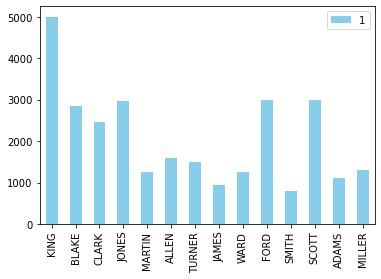

In [3]:
# 사원들의 월급을 막대 그래프로 표현하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select ename,sal from emp """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

emp.index=list(emp[0]) # (KING~MILLER)

emp.plot(kind='bar',color='skyblue')

<AxesSubplot:>

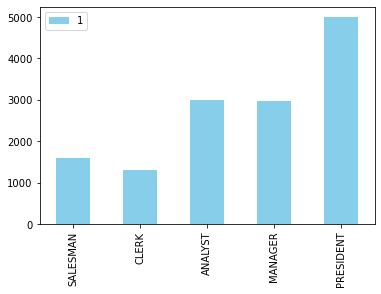

In [4]:
# 직업별 최대 월급을 막대 그래프로 출력하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select job,max(sal) from emp group by job""")

row=cursor.fetchall()

emp=pd.DataFrame(row)

emp.index=list(emp[0])

emp.plot(kind='bar',color='skyblue')

In [5]:
# EMP 테이블 확인하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

print(emp)

       0       1          2       3          4       5       6   7
0   7839    KING  PRESIDENT     NaN 1981-11-17  5000.0     NaN  10
1   7698   BLAKE    MANAGER  7839.0 1981-05-01  2850.0     NaN  30
2   7782   CLARK    MANAGER  7839.0 1981-05-09  2450.0     NaN  10
3   7566   JONES    MANAGER  7839.0 1981-04-01  2975.0     NaN  20
4   7654  MARTIN   SALESMAN  7698.0 1981-09-10  1250.0  1400.0  30
5   7499   ALLEN   SALESMAN  7698.0 1981-02-11  1600.0   300.0  30
6   7844  TURNER   SALESMAN  7698.0 1981-08-21  1500.0     0.0  30
7   7900   JAMES      CLERK  7698.0 1981-12-11   950.0     NaN  30
8   7521    WARD   SALESMAN  7698.0 1981-02-23  1250.0   500.0  30
9   7902    FORD    ANALYST  7566.0 1981-12-11  3000.0     NaN  20
10  7369   SMITH      CLERK  7902.0 1980-12-09   800.0     NaN  20
11  7788   SCOTT    ANALYST  7566.0 1982-12-22  3000.0     NaN  20
12  7876   ADAMS      CLERK  7788.0 1983-01-15  1100.0     NaN  20
13  7934  MILLER      CLERK  7782.0 1982-01-11  1300.0     NaN

In [6]:
# 컬럼명 출력하기1



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

colname=cursor.description

print(colname)

[('EMPNO', <cx_Oracle.DbType DB_TYPE_NUMBER>, 5, None, 4, 0, 0), ('ENAME', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 10, 10, None, None, 1), ('JOB', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 9, 9, None, None, 1), ('MGR', <cx_Oracle.DbType DB_TYPE_NUMBER>, 5, None, 4, 0, 1), ('HIREDATE', <cx_Oracle.DbType DB_TYPE_DATE>, 23, None, None, None, 1), ('SAL', <cx_Oracle.DbType DB_TYPE_NUMBER>, 11, None, 7, 2, 1), ('COMM', <cx_Oracle.DbType DB_TYPE_NUMBER>, 11, None, 7, 2, 1), ('DEPTNO', <cx_Oracle.DbType DB_TYPE_NUMBER>, 3, None, 2, 0, 1)]


In [7]:
# 컬럼명 출력하기 2

import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

colname=cursor.description

for i in colname:

    print(i[0])

EMPNO
ENAME
JOB
MGR
HIREDATE
SAL
COMM
DEPTNO


In [8]:
# 컬럼명을 리스트에 담기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

colname=cursor.description

col=[]

for i in colname:

    col.append(i[0].lower())

print(col)

['empno', 'ename', 'job', 'mgr', 'hiredate', 'sal', 'comm', 'deptno']


In [9]:
# 위 컬럼 리스트를 데이터에 결합시키기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

colname=cursor.description

col=[]

for i in colname:

    col.append(i[0].lower())

emp=pd.DataFrame(list(row),columns=col) #list(row)는 열로, col은 행으로 표현

print(emp)

    empno   ename        job     mgr   hiredate     sal    comm  deptno
0    7839    KING  PRESIDENT     NaN 1981-11-17  5000.0     NaN      10
1    7698   BLAKE    MANAGER  7839.0 1981-05-01  2850.0     NaN      30
2    7782   CLARK    MANAGER  7839.0 1981-05-09  2450.0     NaN      10
3    7566   JONES    MANAGER  7839.0 1981-04-01  2975.0     NaN      20
4    7654  MARTIN   SALESMAN  7698.0 1981-09-10  1250.0  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0 1981-02-11  1600.0   300.0      30
6    7844  TURNER   SALESMAN  7698.0 1981-08-21  1500.0     0.0      30
7    7900   JAMES      CLERK  7698.0 1981-12-11   950.0     NaN      30
8    7521    WARD   SALESMAN  7698.0 1981-02-23  1250.0   500.0      30
9    7902    FORD    ANALYST  7566.0 1981-12-11  3000.0     NaN      20
10   7369   SMITH      CLERK  7902.0 1980-12-09   800.0     NaN      20
11   7788   SCOTT    ANALYST  7566.0 1982-12-22  3000.0     NaN      20
12   7876   ADAMS      CLERK  7788.0 1983-01-15  1100.0     NaN 

In [10]:
# 판다스 문법을 이용해서 이름과 월급을 출력하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

colname=cursor.description

col=[]

for i in colname:

    col.append(i[0].lower())

emp=pd.DataFrame(list(row),columns=col)

print(emp[['ename','sal']])

     ename     sal
0     KING  5000.0
1    BLAKE  2850.0
2    CLARK  2450.0
3    JONES  2975.0
4   MARTIN  1250.0
5    ALLEN  1600.0
6   TURNER  1500.0
7    JAMES   950.0
8     WARD  1250.0
9     FORD  3000.0
10   SMITH   800.0
11   SCOTT  3000.0
12   ADAMS  1100.0
13  MILLER  1300.0


In [11]:
# 판다스 문법을 통해 월급이 3000 이상인 사원의 이름과 월급 출력하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select *

                   from emp

                   """)

row=cursor.fetchall()

colname=cursor.description

col=[]

for i in colname:

    col.append(i[0].lower())

emp=pd.DataFrame(list(row),columns=col)

print(emp[['ename','sal']][emp['sal']>=3000])

    ename     sal
0    KING  5000.0
9    FORD  3000.0
11  SCOTT  3000.0


In [12]:
# 사원의 이름과 부서 위치를 조인을 통해 출력하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select e.ename,d.loc

                   from emp e, dept d

                   where e.deptno=d.deptno

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

print(emp)

         0         1
0     KING  NEW YORK
1    BLAKE   CHICAGO
2    CLARK  NEW YORK
3    JONES    DALLAS
4   MARTIN   CHICAGO
5    ALLEN   CHICAGO
6   TURNER   CHICAGO
7    JAMES   CHICAGO
8     WARD   CHICAGO
9     FORD    DALLAS
10   SMITH    DALLAS
11   SCOTT    DALLAS
12   ADAMS    DALLAS
13  MILLER  NEW YORK


In [13]:
# 부서 위치별 월급 총합 출력하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select d.loc, sum(e.sal)

                   from emp e, dept d

                   where e.deptno=d.deptno

                   group by d.loc

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

print(emp)

          0      1
0  NEW YORK   8750
1    DALLAS  10875
2   CHICAGO   9400


<AxesSubplot:>

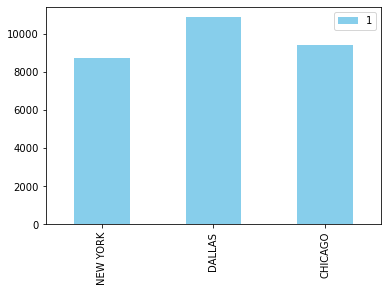

In [14]:
# 부서 위치별 월급 총합을 막대 그래프로 표현하기



import cx_Oracle

import pandas as pd

dsn=cx_Oracle.makedsn("localhost",1521,'orcl')

db=cx_Oracle.connect('scott','tiger',dsn)

cursor=db.cursor()

cursor.execute("""select d.loc, sum(e.sal)

                   from emp e, dept d

                   where e.deptno=d.deptno

                   group by d.loc

                   """)

row=cursor.fetchall()

emp=pd.DataFrame(row)

emp.index=list(emp[0])

emp.plot(kind='bar',color='skyblue')